# #snydercut Tweets Sentiment Analysis

In [28]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from textblob import TextBlob
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [37]:
stopwords = ENGLISH_STOP_WORDS.union(['movie', 'film', 'zack', 'snyder', 'cut', 'snydercut', 'justice', 'league', 'justiceleague', 'zacksnydersjusticeleague', 'zsjl', 's'])

In [38]:
tweets = pd.read_csv('snyderCutTweets1300.csv')
tweets['Tweet'] = tweets['Tweet'].str.lower()
tweets.head()

,Tweet
0,no wonder ben affleck didn t want to do an...
1,the snydercut sets up a slew of sequels ...
2,snydercut is the film of abed
3,no one does chest hair like henry cavill ...
4,the justice league snyder cut is way better t...


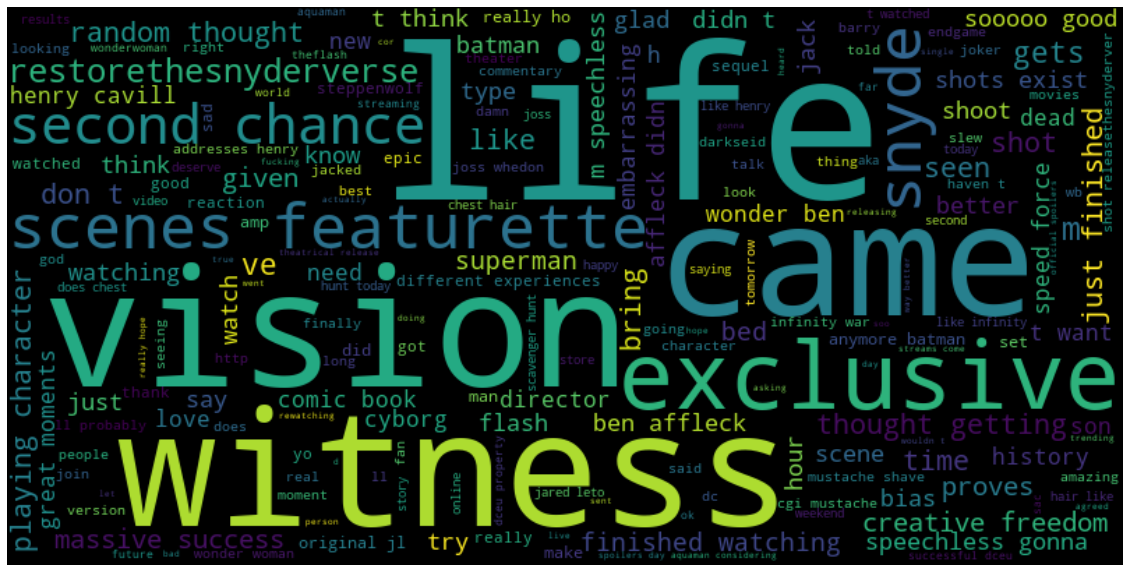

In [39]:
cloud = WordCloud(stopwords=stopwords, background_color="black", width=800, height=400).generate(' '.join(tweets['Tweet']))
plt.figure(figsize=(20,20))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [47]:
def subjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity
def polarity(tweet):
    return TextBlob(tweet).sentiment.polarity

In [49]:
tweets['Subjectivity'] = tweets['Tweet'].apply(subjectivity)
tweets['Polarity'] = tweets['Tweet'].apply(polarity)

In [51]:
tweets.head()

,Tweet,Subjectivity,Polarity
0,no wonder ben affleck didn t want to do an...,0.475,0.2875
1,the snydercut sets up a slew of sequels ...,0.000,0.0000
2,snydercut is the film of abed,0.000,0.0000
3,no one does chest hair like henry cavill ...,0.000,0.0000
4,the justice league snyder cut is way better t...,0.500,0.5000


In [52]:
def score(polarity):
    if polarity < 0:
        return 'Negative'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [53]:
tweets['Score'] = tweets['Polarity'].apply(score)

In [54]:
tweets.head()

,Tweet,Subjectivity,Polarity,Score
0,no wonder ben affleck didn t want to do an...,0.475,0.2875,Positive
1,the snydercut sets up a slew of sequels ...,0.000,0.0000,Neutral
2,snydercut is the film of abed,0.000,0.0000,Neutral
3,no one does chest hair like henry cavill ...,0.000,0.0000,Neutral
4,the justice league snyder cut is way better t...,0.500,0.5000,Positive


In [75]:
from gensim.corpora.dictionary import Dictionary
from gensim.parsing.preprocessing import remove_stopwords
from nltk.tokenize import word_tokenize

In [98]:
tokenized_tweets = [word_tokenize(tweet) for tweet in tweets['Tweet']]
stopwords = stopwords.union('snydercut', 'a')

for i, tokenized in enumerate(tokenized_tweets):
    tokenized_tweets[i] = [word for word in tokenized_tweets[i] if word not in stopwords and len(word) > 1]

print(tokenized_tweets)
dictionary = Dictionary(tokenized_tweets)
dictionary.token2id

[['wonder', 'ben', 'affleck', 'didn', 'want', 'anymore', 'batman', 'embarrassing', 'shoots', 'original', 'jl', 'really', 'ho'], ['sets', 'slew', 'sequels', 'll', 'probably', 'time', 'shoot', 'shot', 'releasethesnyderver'], ['abed'], ['does', 'chest', 'hair', 'like', 'henry', 'cavill'], ['way', 'better', 'make', 'dc', 'movies', 'rated'], ['does', 'chest', 'hair', 'like', 'henry', 'cavill'], ['superman', 'died', 'quietly'], ['got', 'hour', 'figure', 'watching', 'hour', 'pieces', 'far'], ['witness', 'vision', 'came', 'life', 'exclusive', 'scenes', 'featurette', 'snyde'], ['barry', 'fucking', 'allen', 'using', 'speed', 'force', 'time', 'travel', 'fucking', 'love'], ['actually', 'prefer', 'cyborg', 'personality', 'teen', 'titans', 'moody', 'nigga'], ['random', 'thought', 'getting', 'second', 'chance', 'bring', 'life', 'playing', 'character', 'gets', 'second', 'chance', 'life'], ['amazing'], ['amazing'], ['witness', 'vision', 'came', 'life', 'exclusive', 'scenes', 'featurette', 'snyde'], ['d

{'affleck': 0,
 'anymore': 1,
 'batman': 2,
 'ben': 3,
 'didn': 4,
 'embarrassing': 5,
 'ho': 6,
 'jl': 7,
 'original': 8,
 'really': 9,
 'shoots': 10,
 'want': 11,
 'wonder': 12,
 'll': 13,
 'probably': 14,
 'releasethesnyderver': 15,
 'sequels': 16,
 'sets': 17,
 'shoot': 18,
 'shot': 19,
 'slew': 20,
 'time': 21,
 'abed': 22,
 'cavill': 23,
 'chest': 24,
 'does': 25,
 'hair': 26,
 'henry': 27,
 'like': 28,
 'better': 29,
 'dc': 30,
 'make': 31,
 'movies': 32,
 'rated': 33,
 'way': 34,
 'died': 35,
 'quietly': 36,
 'superman': 37,
 'far': 38,
 'figure': 39,
 'got': 40,
 'hour': 41,
 'pieces': 42,
 'watching': 43,
 'came': 44,
 'exclusive': 45,
 'featurette': 46,
 'life': 47,
 'scenes': 48,
 'snyde': 49,
 'vision': 50,
 'witness': 51,
 'allen': 52,
 'barry': 53,
 'force': 54,
 'fucking': 55,
 'love': 56,
 'speed': 57,
 'travel': 58,
 'using': 59,
 'actually': 60,
 'cyborg': 61,
 'moody': 62,
 'nigga': 63,
 'personality': 64,
 'prefer': 65,
 'teen': 66,
 'titans': 67,
 'bring': 68,
 'c

In [99]:
corpus = [dictionary.doc2bow(tweet) for tweet in tokenized_tweets]
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1)],
 [(13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1)],
 [(22, 1)],
 [(23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1)],
 [(29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1)],
 [(23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1)],
 [(35, 1), (36, 1), (37, 1)],
 [(38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1)],
 [(44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1)],
 [(21, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 2),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1)],
 [(60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1)],
 [(47, 2),
  (68, 1),
  (69, 2),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 2),
  (76, 1)],
 [(77, 1)],
 [(77, 1)],
 [(44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1)],
 [(47, 1), (78, 1), (79, 1), (80, 1)

In [101]:
from collections import defaultdict
import itertools
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True)

for word_id, word_count in sorted_word_count[:20]:
    print(dictionary.get(word_id), word_count)

life 210
scenes 115
vision 106
second 104
featurette 103
witness 103
came 102
exclusive 102
snyde 101
chance 101
just 91
restorethesnyderverse 81
like 80
watching 78
shots 71
think 70
gets 61
thought 61
ve 61
character 58
